In [1]:
import sys, platform
print("Python:", sys.version)
print("OS:", platform.platform())


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
OS: Linux-6.6.105+-x86_64-with-glibc2.35


In [2]:
!pip install numpy==1.26.4 statsmodels==0.14.1 scikit-learn pandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 64.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.5
    Uninstalling statsmodels-0.14.5:
      Successfully uninstalled statsmodels-0.14.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
train = data.iloc[:-12]
test  = data.iloc[-12:]


In [4]:
model = SARIMAX(train['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
fit = model.fit(disp=False)
pred = fit.predict(start=test.index[0], end=test.index[-1])


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
mae = mean_absolute_error(test['Passengers'], pred)
mse = mean_squared_error(test['Passengers'], pred)

print("MAE:", mae)
print("MSE:", mse)


MAE: 16.316909257741287
MSE: 448.8850983362028


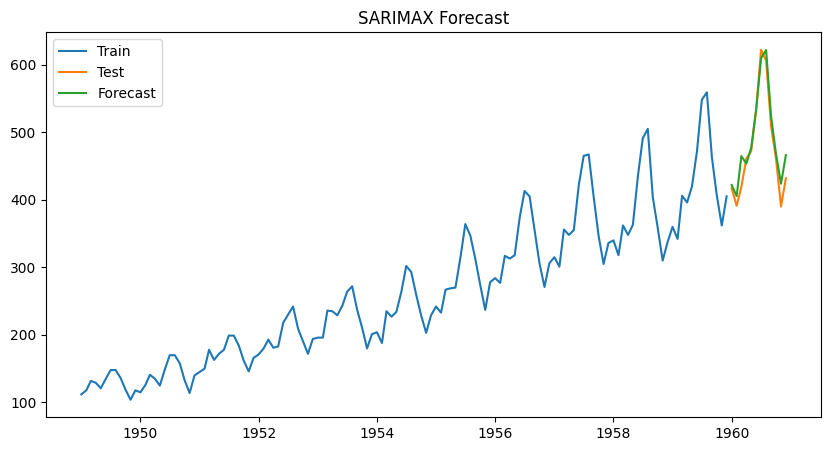

In [6]:
plt.figure(figsize=(10,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(pred, label='Forecast')
plt.legend()
plt.title("SARIMAX Forecast")
plt.show()


In [7]:
results = pd.DataFrame({
    'Actual': test['Passengers'],
    'Forecast': pred
})
results.to_csv("forecast_results.csv", index=True)
print("✅ forecast_results.csv saved")


✅ forecast_results.csv saved


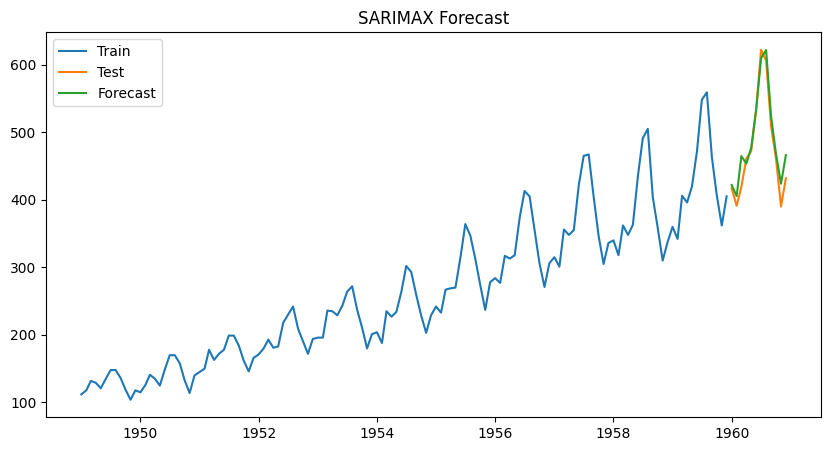

✅ forecast_plot.png saved


In [8]:
plt.figure(figsize=(10,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(pred, label='Forecast')
plt.legend()
plt.title("SARIMAX Forecast")
plt.savefig("forecast_plot.png")
plt.show()
print("✅ forecast_plot.png saved")


In [9]:
with open("model_summary.txt", "w") as f:
    f.write(fit.summary().as_text())

print("✅ model_summary.txt saved")


✅ model_summary.txt saved
